#to predict the net hourly electrical energy output (EP)  of the plant.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.linear_model import LinearRegression 

In [2]:
os.chdir("C:/Users/hp/Downloads/CCPP/CCPP")

In [3]:
df = pd.read_excel('cycle_power.xlsx')

In [4]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [5]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
df.shape

(9568, 5)

In [7]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [9]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


## Identify outlier using box plot

<AxesSubplot:>

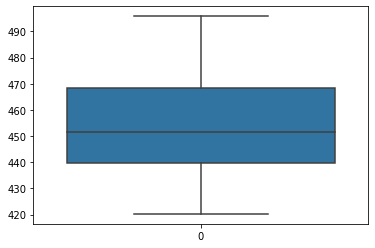

In [10]:
sns.boxplot(data=df['PE'])

<AxesSubplot:>

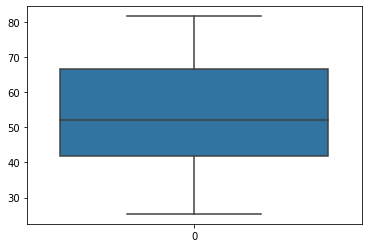

In [11]:
sns.boxplot(data=df['V'])

<AxesSubplot:>

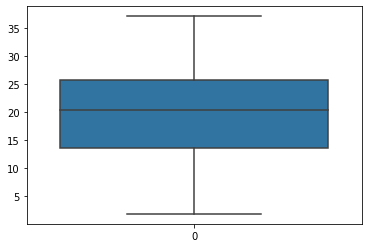

In [12]:
sns.boxplot(data=df['AT'])

<AxesSubplot:>

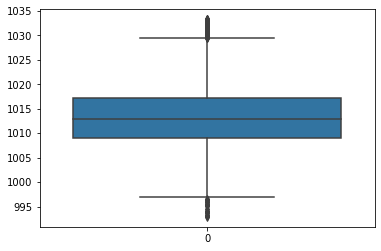

In [13]:
sns.boxplot(data=df['AP'])

## Remove outliers

In [14]:
Q1 = df.AP.quantile(0.25)
Q1

1009.1

In [15]:
Q3 = df.AP.quantile(0.75)
Q3

1017.26

In [16]:
IQR = Q3-Q1
IQR

8.159999999999968

In [17]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(996.8600000000001, 1029.5)

In [18]:
df[(df.AP<lower_limit)|(df.AP>upper_limit)]

,AT,V,AP,RH,PE
238,13.49,44.47,1030.46,69.49,466.66
319,9.25,41.82,1033.25,74.73,478.48
368,13.49,44.47,1030.18,69.15,468.46
536,9.11,40.02,1031.10,83.02,479.03
571,5.97,36.25,1029.65,86.74,487.03
...,...,...,...,...,...
9068,15.62,41.23,992.89,83.99,463.21
9159,7.20,40.02,1031.71,69.89,480.53
9267,12.51,41.92,1031.21,64.66,468.41
9342,8.72,40.02,1031.32,78.09,477.86


In [19]:
df_no_outlier = df[(df.AP>lower_limit)&(df.AP<upper_limit)]
df_no_outlier

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


<AxesSubplot:>

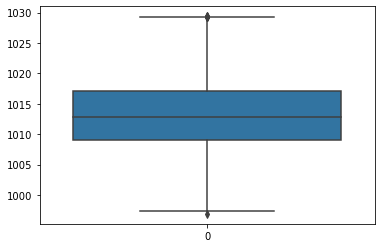

In [20]:
sns.boxplot(data=df_no_outlier['AP'])

<AxesSubplot:>

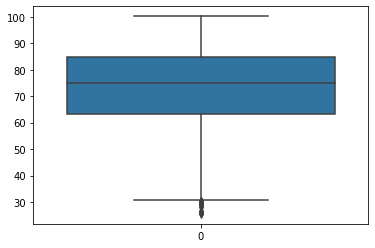

In [21]:
sns.boxplot(data=df_no_outlier['RH'])

In [22]:
Q1 = df_no_outlier.RH.quantile(0.25)
Q3 = df_no_outlier.RH.quantile(0.75)
Q1,Q3

(63.2275, 84.83)

In [23]:
IQR = Q3-Q1
IQR

21.6025

In [24]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(30.823749999999997, 117.23375)

In [25]:
df_no_outlier[(df_no_outlier.RH<lower_limit)|(df_no_outlier.RH>upper_limit)]

,AT,V,AP,RH,PE
789,34.30,74.67,1015.98,25.89,427.84
2262,33.94,74.67,1015.94,28.16,427.98
3603,19.78,44.71,1015.70,29.43,465.49
4367,34.65,74.67,1016.03,26.67,427.69
6472,33.83,67.90,1005.94,29.86,428.12
7983,19.31,44.71,1016.13,30.59,463.00
8061,34.24,74.67,1016.24,25.56,425.58
8751,19.32,44.71,1015.30,28.81,464.38
9015,35.01,74.67,1016.10,26.30,428.48
9074,34.18,67.90,1005.87,30.34,425.50


In [26]:
df_no_outlier.drop(789,inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
df_no_outlier.drop(2262,inplace=True)

In [28]:
df_no_outlier.drop(3603,inplace=True)

In [29]:
df_no_outlier.drop(4367,inplace=True)

In [30]:
df_no_outlier.drop(6472,inplace=True)

In [31]:
df_no_outlier.drop(7983,inplace=True)

In [32]:
df_no_outlier.drop(8061,inplace=True)

In [33]:
df_no_outlier.drop(8751,inplace=True)

In [34]:
df_no_outlier.drop(9015,inplace=True)

In [35]:
df_no_outlier.drop(9074,inplace=True)

<AxesSubplot:>

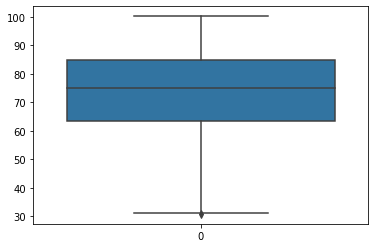

In [36]:
sns.boxplot(data=df_no_outlier['RH'])

<AxesSubplot:>

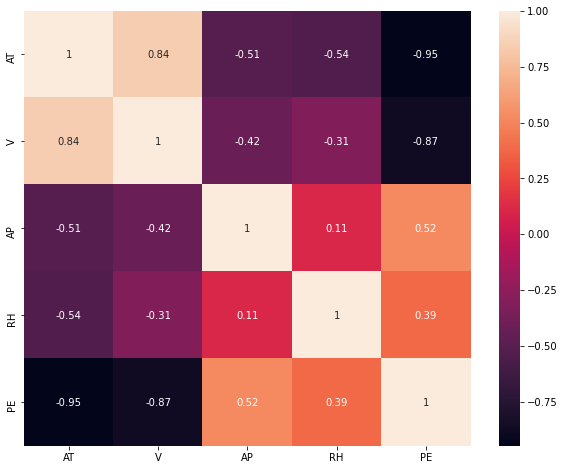

In [38]:
plt.figure(figsize=[10,8])
sns.heatmap(df_no_outlier.corr(),annot=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


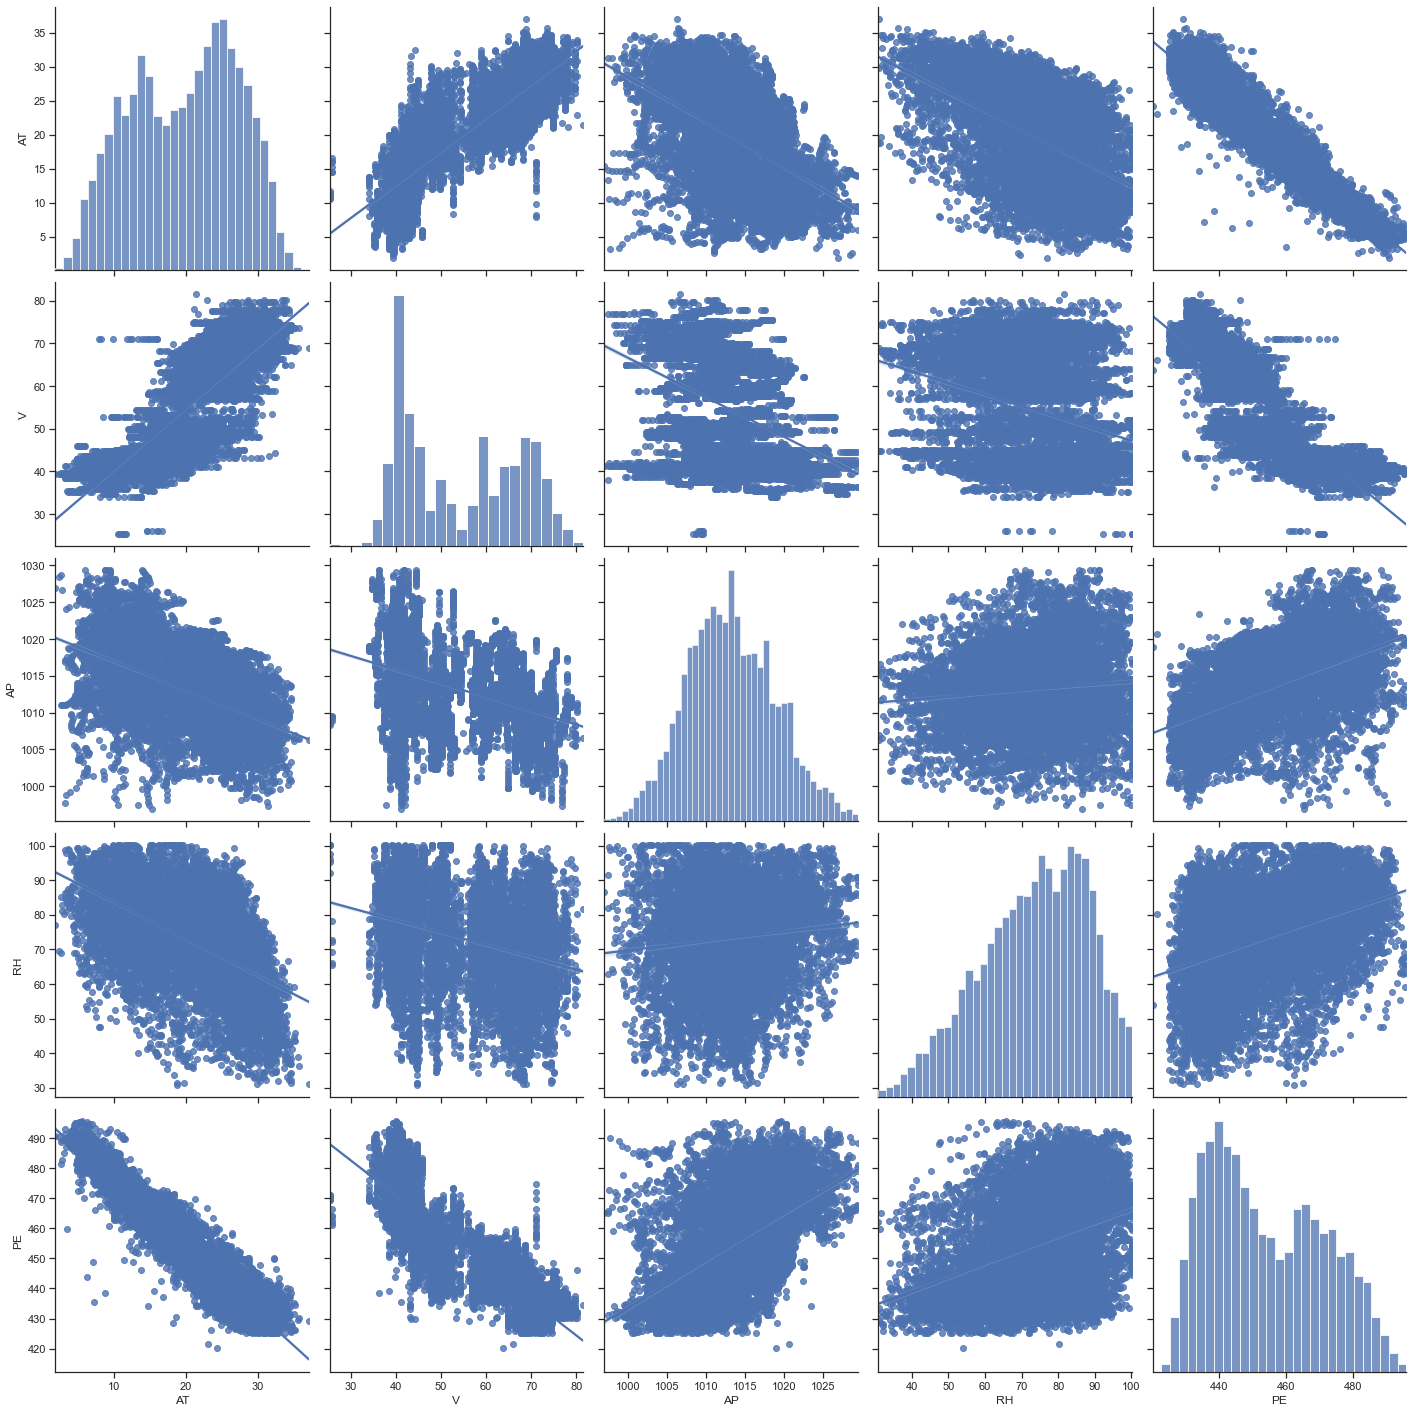

In [39]:
#Pair plot
sns.set(style='ticks')
sns.pairplot(df_no_outlier,size=4,kind='reg')

## Analysis on target variable

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


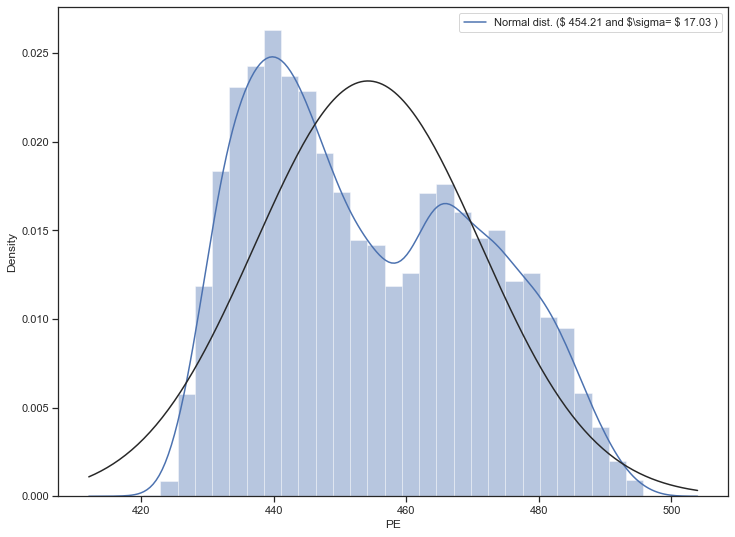

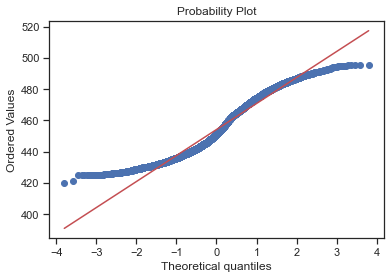

In [40]:
plt.subplots(figsize=(12,9))
sns.distplot(df_no_outlier['PE'],fit=stats.norm)
#get the fitted parameter used by the function
(mu,sigma)=stats.norm.fit(df_no_outlier['PE'])
#plot with the distribution
plt.legend(['Normal dist. ($ {:.2f} and $\sigma= $ {:.2f} )'.format(mu,sigma)],loc='best')
#probability plot
fig=plt.figure()
stats.probplot(df_no_outlier['PE'],plot=plt)
plt.show()

## Linear Regression with all variable

In [41]:
#Linear Regression with all variables.
lm=LinearRegression()

In [43]:
y=df_no_outlier['PE']

In [44]:
x=df_no_outlier.drop(['PE'],axis=1)

In [45]:
x.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [46]:
lm.fit(x,y)

LinearRegression()

In [47]:
print("Intercept for the multiple Linear regression is:",lm.intercept_)
print("Coef for multiple linear regression is:",lm.coef_)

Intercept for the multiple Linear regression is: 442.1949476893135
Coef for multiple linear regression is: [-1.9743445  -0.23429539  0.07434486 -0.15856157]


In [48]:
yhat=lm.predict(x)

In [49]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
mse=mean_squared_error(y,yhat)
r_squared=r2_score(y,yhat)
rmse=sqrt(mse)

In [50]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("r_square_value:",r_squared)

Mean_squared_error: 20.847718900013902
Root_mean_squared_error: 4.565930233809306
r_square_value: 0.9281006486811393


In [51]:
#Take the values as X and Y
x=x.values
y=y.values

## Standard Scaling

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scale=StandardScaler()

In [54]:
x_sc=scale.fit_transform(x)

In [55]:
lm_sc=lm.fit(x_sc,y)

In [56]:
yhat_sc=lm.predict(x_sc)

In [57]:
mse=mean_squared_error(y,yhat_sc)
r_squared=r2_score(y,yhat_sc)
rmse=sqrt(mse)

In [58]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("r_square_value:",r_squared)

Mean_squared_error: 20.847718900013902
Root_mean_squared_error: 4.565930233809306
r_square_value: 0.9281006486811393


## Linear Regression with Train-Test Split

In [59]:
#split data into train and test format
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [60]:
model=LinearRegression()

In [61]:
model.fit(x_train,y_train)

LinearRegression()

In [62]:
#prediction for a train data
pred=model.predict(x_train)

In [63]:
#Score/Accuracy
print('Accuracy',model.score(x_train,y_train)*100)

Accuracy 92.76476188019407


In [64]:
mse=mean_squared_error(y_train,pred)
r_squared=r2_score(y_train,pred)
rmse=sqrt(mse)

In [65]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("r_square_value:",r_squared)

Mean_squared_error: 20.913866691638045
Root_mean_squared_error: 4.573168124138674
r_square_value: 0.9276476188019407


In [66]:
#Prediction for test data.
pred_t=model.predict(x_test)

In [67]:
#Score/Accuracy
print('Accuracy',model.score(x_test,y_test)*100)

Accuracy 92.97910763319362


In [68]:
mse=mean_squared_error(y_test,pred_t)
r_squared=r2_score(y_test,pred_t)
rmse=sqrt(mse)

In [69]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("r_square_value:",r_squared)

Mean_squared_error: 20.591593185923017
Root_mean_squared_error: 4.537796071434129
r_square_value: 0.9297910763319361


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


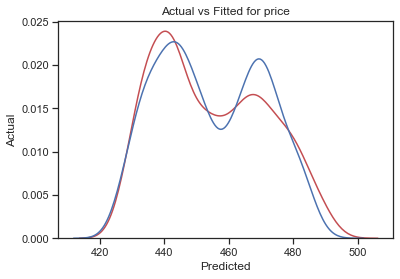

In [70]:
#Distribution plot of actual and predicted values
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual values')
sns.distplot(pred_t,hist=False,color='b',label='Predicted values',ax=ax1)
plt.title('Actual vs Fitted for price')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Polynomial Regression

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [72]:
#Raise degree of independent var
pr=PolynomialFeatures(degree=2)

In [73]:
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)

In [74]:
model_pr=model.fit(x_train_pr,y_train)

In [75]:
model_pre=model.predict(x_test_pr)

In [76]:
model_pre[0:5]

array([445.70473384, 443.92486549, 472.08301277, 483.16023328,
       464.49886329])

In [77]:
y_test[0:5]

array([440.89, 443.51, 474.35, 476.61, 461.14])

In [78]:
mse=mean_squared_error(y_test,model_pre)
r_squared=r2_score(y_test,model_pre)
rmse=sqrt(mse)

In [79]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("r_square_value:",r_squared)

Mean_squared_error: 17.71747721670852
Root_mean_squared_error: 4.209213372675293
r_square_value: 0.939590638069281


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


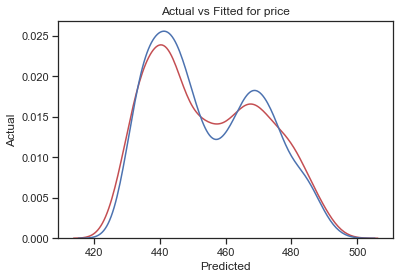

In [80]:
#Distribution plot of actual and predicted values
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual values')
sns.distplot(model_pre,hist=False,color='b',label='Predicted values',ax=ax1)
plt.title('Actual vs Fitted for price')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Cross validation on Linear Regression 

In [81]:
model.fit(x_train,y_train)

LinearRegression()

In [82]:
model.score(x_test,y_test)

0.9297910763319361

In [83]:
model.score(x_train,y_train)

0.9276476188019407

In [84]:
from sklearn.model_selection import cross_val_score

In [86]:
Rcross=cross_val_score(model,x_train,y_train,cv=4)

In [87]:
Rcross

array([0.93099359, 0.92897408, 0.92375721, 0.92627008])

## Ridge Regression

In [88]:
from sklearn.linear_model import Ridge

In [89]:
RidgeModel=Ridge(alpha=0.1)

In [90]:
RidgeModel.fit(x_train,y_train)

Ridge(alpha=0.1)

In [91]:
yhat_Ridge=RidgeModel.predict(x_test)

In [92]:
print('Predicted',yhat_Ridge[0:4])

Predicted [447.66342247 445.55378333 471.57575352 480.00297249]


In [93]:
print('Test set values',y_test[0:4])

Test set values [440.89 443.51 474.35 476.61]


In [94]:
#R score for test split
Rcross1=cross_val_score(RidgeModel,x_test,y_test,cv=4)

In [95]:
Rcross1

array([0.9265247 , 0.9289087 , 0.93440373, 0.92802376])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


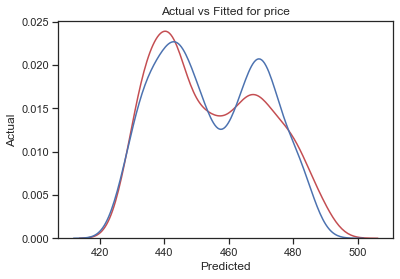

In [96]:
#Distribution plot of actual and predicted values
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual values')
sns.distplot(yhat_Ridge,hist=False,color='b',label='Predicted values',ax=ax1)
plt.title('Actual vs Fitted for price')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [97]:
# R score for train split
Rcross2=cross_val_score(RidgeModel,x_train,y_train,cv=4)

In [98]:
Rcross2

array([0.93099358, 0.92897408, 0.92375721, 0.92627009])

## Grid Search for Hyperparameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
parameters1=[{'alpha':[0.001,0.1,1,10,100,1000,10000,100000]}]

In [101]:
RR=Ridge()

In [102]:
RR

Ridge()

In [103]:
Grid1=GridSearchCV(RR,parameters1,cv=4)

In [104]:
Grid1.fit(x_test,y_test)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [105]:
BestRR=Grid1.best_estimator_

In [106]:
BestRR

Ridge(alpha=0.001)

In [107]:
BestRR.score(x_test,y_test)

0.9299325112250856

In [108]:
# R score for test split
Rcross3=cross_val_score(Grid1,x_test,y_test,cv=4)

In [109]:
Rcross3

array([0.92652465, 0.92890881, 0.93440377, 0.92802373])